**CREATE A MODEL TO CLASSIFY THE IMAGES OF CATS AND DOGS.**

MOUNT THE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT ALL LIBRARIES

In [ ]:
 ## Importing all the libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

LOAD THE DATASET

In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Cats-Dogs-2.zip'  # your zip file
extract_to = 'extracted_path'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [ ]:
data_dir = '/content/extracted_path/PetImages'

PREPROCESSING THE MODEL

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


BUILD THE CNN MODEL

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


DELETE THE UNNECESSARY IMAGES

In [ ]:
import os
from PIL import Image

folder_path = '/content/extracted_path/PetImages'

for category in ['Cat', 'Dog']:
    folder = os.path.join(folder_path, category)
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            img = Image.open(file_path)
            img.verify()  # Check if image is corrupted
        except (IOError, SyntaxError):
            print(f"Deleting corrupted file: {file_path}")
            os.remove(file_path)


Deleting corrupted file: /content/extracted_path/PetImages/Cat/666.jpg
Deleting corrupted file: /content/extracted_path/PetImages/Cat/Thumbs.db


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Deleting corrupted file: /content/extracted_path/PetImages/Dog/11702.jpg
Deleting corrupted file: /content/extracted_path/PetImages/Dog/Thumbs.db


In [ ]:
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


TRAIN THE MODEL

In [ ]:
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1062s 2s/step - accuracy: 0.5572 - loss: 0.6895 - val_accuracy: 0.6847 - val_loss: 0.5937
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1044s 2s/step - accuracy: 0.7148 - loss: 0.5585 - val_accuracy: 0.7863 - val_loss: 0.4511
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1085s 2s/step - accuracy: 0.7929 - loss: 0.4449 - val_accuracy: 0.8065 - val_loss: 0.4115
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1068s 2s/step - accuracy: 0.8345 - loss: 0.3727 - val_accuracy: 0.8141 - val_loss: 0.4065
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1042s 2s/step - accuracy: 0.8594 - loss: 0.3192 - val_accuracy: 0.8299 - val_loss: 0.3810
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1043s 2s/step - accuracy: 0.8924 - loss: 0.2570 - val_accuracy: 0.8423 - val_loss: 0.3719
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1062s 2s/step - accuracy: 0.9197 - loss: 0.1940 - val_accuracy: 0.8391 - val_loss: 0.4286
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1048s 2s/step - accuracy: 0.9470 - loss: 0.1376 - val_accurac

VAIDATE THE ERROR AND ACCURACY

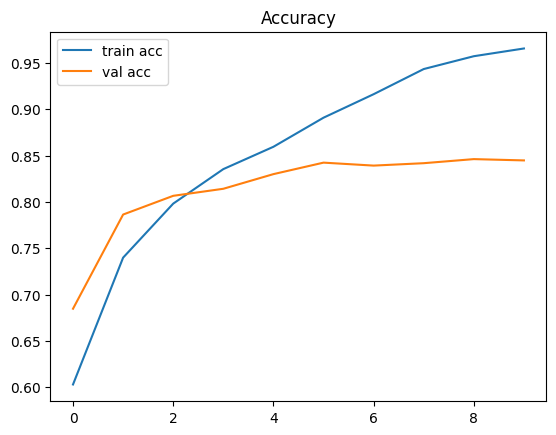

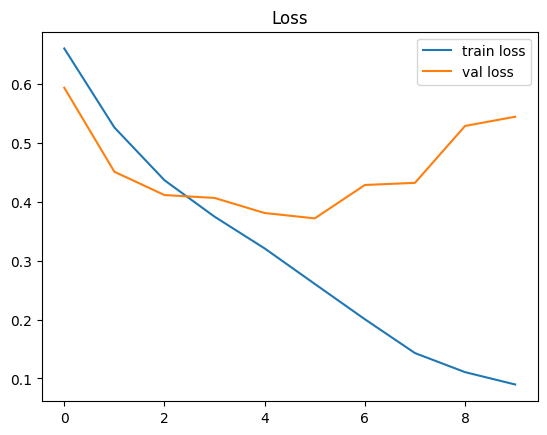

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

**HENCE, WE GOT THE APPROXIMATELY 96% ACCURACY AND APPROX 0.08% LOSS IN THE MODEL**